In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#df = pd.read_csv(r'C:\Users\daniejackson\Desktop\eMergeEducation\Subfolder1\eMergeEducation')
df = pd.read_csv('0. data.csv')#df = pd.read_csv(r'C:\Users\raguilarsoriano\OneDrive - Deloitte (O365D)\1. AI Academy\eMergeEducation\0. data.csv')

In [3]:
df.head(5)

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [4]:
df.tail(5)

Marital status  Application mode  Application order  Course  \
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
4419                           125.0            1                       1   
4420                           120.0          105                       1   
4421                           154.0            1                      37   
4422                           180.0            1                      37   
4423                           152.0           22                      38   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
4419                       1  ...                                    0   
4420                       1  ...                                    0   
4421                      37  ...                                    0   
4422                      37  ...                                    0   
4423                      37  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
4419                                       8   
4420                                       6   
4421                                       9   
4422                                       6   
4423                                       6   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
4419                                    5                         12.666667   
4420                                    2                         11.000000   
4421                                    1                         13.500000   
4422                                    5                         12.000000   
4423                                    6                         13.000000   

      Curricular units 2nd sem (without evaluations)  Unemployment rate  \
4419                                               0               15.5   
4420                                               0               11.1   
4421                                               0               13.9   
4422                                               0                9.4   
4423                                               0               12.7   

      Inflation rate   GDP    Target  
4419             2.8 -4.06  Graduate  
4420             0.6  2.02   Dropout  
4421            -0.3  0.79   Dropout  
4422            -0.8 -3.12  Graduate  
4423             3.7 -1.70  Graduate  

[5 rows x 37 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
# Select column names of object date type
sel_cols_float = list(df.select_dtypes(include='float'))

In [7]:
sel_cols_float

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [8]:
# Select column names of object date type
sel_cols_object = list(df.select_dtypes(include='object'))

In [9]:
sel_cols_object

['Target']

In [10]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

According to the dataset providers, extensive data preprocessing was conducted to address anomalies, unexplainable outliers, and missing values. Despite this effort, certain transformations are still required to prepare the dataset for the next phase, which involves model-building.

Surprisingly, it was discovered that all columns containing categorical data are encoded using a non-linear scale. While the reason for this unconventional encoding remains unknown, the meanings of the numbers are now understood. Therefore, we have decided to convert the existing non-linear scale into a linear one to ensure better interpretability and compatibility with the upcoming modeling process.

We must exercise caution when dealing with columns that have non-linear scales and unique values that should remain unchanged. Let's consider two specific examples to illustrate this point.

Firstly, the "grades" column contains numerical results aggregating student grades. It is crucial that we preserve the original values in this column, as any alteration may lead to inaccurate data representation or misinterpretation of academic performance. Therefore, we will refrain from making any changes to this column.

Conversely, we encounter the "father's qualifications" column, which represents the level of education attained by fathers. As previously mentioned, the numerical values associated with specific levels of education in this column do not follow a linear scale. To enhance the interpretability of this data and improve its visual representation, we should consider transforming the scale for this column.

In [11]:
# Columns that need scale transformation
columns_to_iterate = ['Application mode', 'Application order', 'Course', 
                      'Nacionality',"Mother's qualification", "Father's qualification", "Mother's occupation",
                      "Father's occupation"]
    
# Iterate over each column in the dataset
for col_name in columns_to_iterate:
        
    # Get the unique values in the column
    unique_values = df[col_name].unique()
        
    # Sort values in ascending order
    unique_values_sorted = sorted(unique_values, reverse=False)

    # Count the number of unique values in a column
    count = df[col_name].nunique()
    
    # Print the column name and its unique values in ascednding order
    print(f"Column: {col_name}")
    print(count)
    print(unique_values_sorted)
    print("\n")

Column: Application mode
18
[1, 2, 5, 7, 10, 15, 16, 17, 18, 26, 27, 39, 42, 43, 44, 51, 53, 57]


Column: Application order
8
[0, 1, 2, 3, 4, 5, 6, 9]


Column: Course
17
[33, 171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991]


Column: Nacionality
21
[1, 2, 6, 11, 13, 14, 17, 21, 22, 24, 25, 26, 32, 41, 62, 100, 101, 103, 105, 108, 109]


Column: Mother's qualification
29
[1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19, 22, 26, 27, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


Column: Father's qualification
34
[1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


Column: Mother's occupation
32
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 122, 123, 125, 131, 132, 134, 141, 143, 144, 151, 152, 153, 171, 173, 175, 191, 192, 193, 194]


Column: Father's occupation
46
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 101, 102, 103, 112, 114, 121, 122, 123, 124, 131, 132, 1

The code below creates an histogram of every column. The idea is to create an hisitgram just for the column we wnat to change its scale to compare the frequency of the old values vs the new ones after the transformation scale is done as a visual validation that the process was well performed [Better ideas are accepted].   

In [12]:
'''

# Get the number of columns and calculate the number of rows needed for the subplots
num_cols = df.shape[1]
num_rows = (num_cols + 2) // 3  # Ensures at least 3 plots per line

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(df.columns):

    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black',
                                ax=axes[i])
    axes[i].set_title(f'Frequency Histogram for {col}')
    axes[i].set_xlabel('Unique Values')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any empty subplots if the number of columns is not divisible by 3
for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

'''

"\n\n# Get the number of columns and calculate the number of rows needed for the subplots\nnum_cols = df.shape[1]\nnum_rows = (num_cols + 2) // 3  # Ensures at least 3 plots per line\n\n# Create subplots with 3 columns\nfig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))\n\n# Flatten the axes array for easier iteration\naxes = axes.flatten()\n\n# Plot histograms for each column\nfor i, col in enumerate(df.columns):\n\n    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black',\n                                ax=axes[i])\n    axes[i].set_title(f'Frequency Histogram for {col}')\n    axes[i].set_xlabel('Unique Values')\n    axes[i].set_ylabel('Frequency')\n    axes[i].grid(axis='y', linestyle='--', alpha=0.7)\n\n# Remove any empty subplots if the number of columns is not divisible by 3\nfor i in range(num_cols, num_rows * 3):\n    fig.delaxes(axes[i])\n\nplt.tight_layout()\nplt.show()\n\n"

The code below changes the scale of the column to iterate defined above. 

In [13]:
def replace_values_linear_scale(df):
    
    # Iterate over each column in the dataset
    for col_name in columns_to_iterate:
        
        # Check if the data type of the column is integer
        # if df[col_name].dtype == 'int64':
            
            # Get the unique values in the column
            unique_values = df[col_name].unique()

            # Sort values in ascending order
            unique_values_sorted = sorted(unique_values, reverse=False)

            # Count the number of unique values in a column
            count = df[col_name].nunique()

            # Create a dictionary to store the old value - new value mapping
            value_mapping = {}

            # Generate a new list for values based on linear scaling
            new_values = list(range(1, count + 1))

            # Create a mapping of old values to new values based on the linear scale
            for i, old_val in enumerate(unique_values_sorted):
                new_val = new_values[i]
                value_mapping[old_val] = new_val

            # Replace values in the dataframe using the mapping
            df[col_name] = df[col_name].replace(value_mapping)
            
    return df
replace_values_linear_scale(df)

Marital status  Application mode  Application order  Course  \
0                  1                 8                  6       2   
1                  1                 6                  2      11   
2                  1                 1                  6       5   
3                  1                 8                  3      15   
4                  2                12                  2       3   
...              ...               ...                ...     ...   
4419               1                 1                  7      15   
4420               1                 1                  3      15   
4421               1                 1                  2      12   
4422               1                 1                  2       9   
4423               1                 5                  2      15   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                                1                       1   
4                                0                       1   
...                            ...                     ...   
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      13   
1                              160.0            1                       1   
2                              122.0            1                      22   
3                              122.0            1                      23   
4                              100.0            1                      22   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0           19                       1   
4421                           154.0            1                      22   
4422                           180.0            1                      22   
4423                           152.0            9                      23   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                         10  ...                                    0   
1                          3  ...                                    0   
2                         27  ...                                    0   
3                         27  ...                                    0   
4                         28  ...                                    0   
...                      ...  ...                                  ...   
4419                       1  ...                                    0   
4420                       1  ...                                    0   
4421                      27  ...                                    0   
4422                      27  ...                                    0   
4423                      27  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                            

#### we need to convert the TARGET column to numeric column to help us find the correlation with others

In [14]:
#To view the hoe the Target valuable looks 
df['Target'].unique()


array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [15]:
#we can see the three unique values,we can replace them with 0,1,2
df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2,
})

In [16]:
df

Marital status  Application mode  Application order  Course  \
0                  1                 8                  6       2   
1                  1                 6                  2      11   
2                  1                 1                  6       5   
3                  1                 8                  3      15   
4                  2                12                  2       3   
...              ...               ...                ...     ...   
4419               1                 1                  7      15   
4420               1                 1                  3      15   
4421               1                 1                  2      12   
4422               1                 1                  2       9   
4423               1                 5                  2      15   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                                1                       1   
4                                0                       1   
...                            ...                     ...   
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      13   
1                              160.0            1                       1   
2                              122.0            1                      22   
3                              122.0            1                      23   
4                              100.0            1                      22   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0           19                       1   
4421                           154.0            1                      22   
4422                           180.0            1                      22   
4423                           152.0            9                      23   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                         10  ...                                    0   
1                          3  ...                                    0   
2                         27  ...                                    0   
3                         27  ...                                    0   
4                         28  ...                                    0   
...                      ...  ...                                  ...   
4419                       1  ...                                    0   
4420                       1  ...                                    0   
4421                      27  ...                                    0   
4422                      27  ...                                    0   
4423                      27  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                            

In [17]:
# Check Target column, it must have filled with 0, 1 & 2
df['Target'].unique()

array([0, 2, 1], dtype=int64)

We create a copy of df named df1.

In [18]:
df1 = df.copy()

In [19]:
# Iterate over each column in the dataset
for col_name in columns_to_iterate:
        
    # Get the unique values in the column
    unique_values = df[col_name].unique()
        
    # Sort values in ascending order
    unique_values_sorted = sorted(unique_values, reverse=False)

    # Count the number of unique values in a column
    count = df[col_name].nunique()
    
    # Print the column name and its unique values in ascednding order
    print(f"Column: {col_name}")
    print(count)
    print(unique_values_sorted)
    print("\n")

Column: Application mode
18
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


Column: Application order
8
[1, 2, 3, 4, 5, 6, 7, 8]


Column: Course
17
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


Column: Nacionality
21
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


Column: Mother's qualification
29
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


Column: Father's qualification
34
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


Column: Mother's occupation
32
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


Column: Father's occupation
46
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]




## I check the code yesterday and it works. Which means values where changed correctly.

### The code below is supposed to ceate histogram for those colum that suffered from scale transformation. Need a few changes, I can do that later. - Robert

In [20]:
'''

# Get the number of columns and calculate the number of rows needed for the subplots
num_cols = df.shape[1]
num_rows = (num_cols + 2) // 3  # Ensures at least 3 plots per line

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(df.columns):
    df[col].value_counts().plot(kind='bar', color='orange', edgecolor='black',
                                ax=axes[i])
    axes[i].set_title(f'Frequency Histogram for {col}')
    axes[i].set_xlabel('Unique Values')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any empty subplots if the number of columns is not divisible by 3
for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

'''

"\n\n# Get the number of columns and calculate the number of rows needed for the subplots\nnum_cols = df.shape[1]\nnum_rows = (num_cols + 2) // 3  # Ensures at least 3 plots per line\n\n# Create subplots with 3 columns\nfig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))\n\n# Flatten the axes array for easier iteration\naxes = axes.flatten()\n\n# Plot histograms for each column\nfor i, col in enumerate(df.columns):\n    df[col].value_counts().plot(kind='bar', color='orange', edgecolor='black',\n                                ax=axes[i])\n    axes[i].set_title(f'Frequency Histogram for {col}')\n    axes[i].set_xlabel('Unique Values')\n    axes[i].set_ylabel('Frequency')\n    axes[i].grid(axis='y', linestyle='--', alpha=0.7)\n\n# Remove any empty subplots if the number of columns is not divisible by 3\nfor i in range(num_cols, num_rows * 3):\n    fig.delaxes(axes[i])\n\nplt.tight_layout()\nplt.show()\n\n"

### EXPLORATARY DATA ANALYSIS

 Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. During EDA, we carefully examine and summarize the main characteristics of our dataset to gain insights, detect patterns, identify potential problems, and formulate hypotheses .describing our data during EDA is fundamental for understanding, cleaning, and preparing the data for analysis. It provides insights into the dataset's characteristics and guides decision-making throughout the data analysis process.

In [21]:
#we need to find out how many dropouts, enrolled  and graduates are there in from the TARGET column
#WHERE Dropout = 0, enrolled = 1 and Graduate = 2


In [22]:
df1['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

#### We want to find the correlation of the Target Variable (Target) with other numeric columns

In [23]:
# Plot the above values
x = df['Target'].value_counts().index
y = df['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()
#plt.savefig("how many dropout,enrolled & graduates are there in the Target column.jpg")
#save the image
plt.savefig('fig.png')

<Figure size 640x480 with 0 Axes>

In [24]:
#df1

### Let's see the correlation of each variable with the other.


In [25]:
corr = df1.corr()
corr

Marital status  \
Marital status                                        1.000000   
Application mode                                      0.224855   
Application order                                    -0.125960   
Course                                                0.018925   
Daytime/evening attendance\t                         -0.274939   
Previous qualification                                0.062529   
Previous qualification (grade)                       -0.022406   
Nacionality                                          -0.020722   
Mother's qualification                                0.185522   
Father's qualification                                0.128326   
Mother's occupation                                   0.069734   
Father's occupation                                   0.024351   
Admission grade                                      -0.004771   
Displaced                                            -0.234886   
Educational special needs                            -0.028343   
Debtor                                                0.034304   
Tuition fees up to date                              -0.087158   
Gender                                               -0.014738   
Scholarship holder                                   -0.053765   
Age at enrollment                                     0.522717   
International                                        -0.027905   
Curricular units 1st sem (credited)                   0.061209   
Curricular units 1st sem (enrolled)                   0.052107   
Curricular units 1st sem (evaluations)                0.058030   
Curricular units 1st sem (approved)                  -0.031027   
Curricular units 1st sem (grade)                     -0.059811   
Curricular units 1st sem (without evaluations)        0.034711   
Curricular units 2nd sem (credited)                   0.062831   
Curricular units 2nd sem (enrolled)                   0.039026   
Curricular units 2nd sem (evaluations)                0.022784   
Curricular units 2nd sem (approved)                  -0.043739   
Curricular units 2nd sem (grade)                     -0.071506   
Curricular units 2nd sem (without evaluations)        0.020426   
Unemployment rate                                    -0.020338   
Inflation rate                                        0.008761   
GDP                                                  -0.027003   
Target                                               -0.089804   

                                                Application mode  \
Marital status                                          0.224855   
Application mode                                        1.000000   
Application order                                      -0.247235   
Course                                                 -0.085116   
Daytime/evening attendance\t                           -0.268616   
Previous qualification                                  0.418200   
Previous qualification (grade)                         -0.043395   
Nacionality                                            -0.001360   
Mother's qualification                                  0.092867   
Father's qualification                                  0.072798   
Mother's occupation                                     0.033489   
Father's occupation                                     0.001253   
Admission grade                                        -0.017514   
Displaced                                              -0.263079   
Educational special needs                              -0.030868   
Debtor                                                  0.114348   
Tuition fees up to date                                -0.127339   
Gender                                                  0.147226   
Scholarship holder                                     -0.152818   
Age at enrollment                                       0.450700   
International                                           0.005050   
Curricular units 1st sem (credited)        

### Let's see the correlation of the Target variables with other variables.


In [26]:
Target_corr = df1.corr()['Target'] # We could create a heat map to visualize all the relations more easily
Target_corr

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.090008
Course                                            0.007841
Daytime/evening attendance\t                      0.075107
Previous qualification                           -0.056039
Previous qualification (grade)                    0.103764
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Admission grade                                   0.120889
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.4098

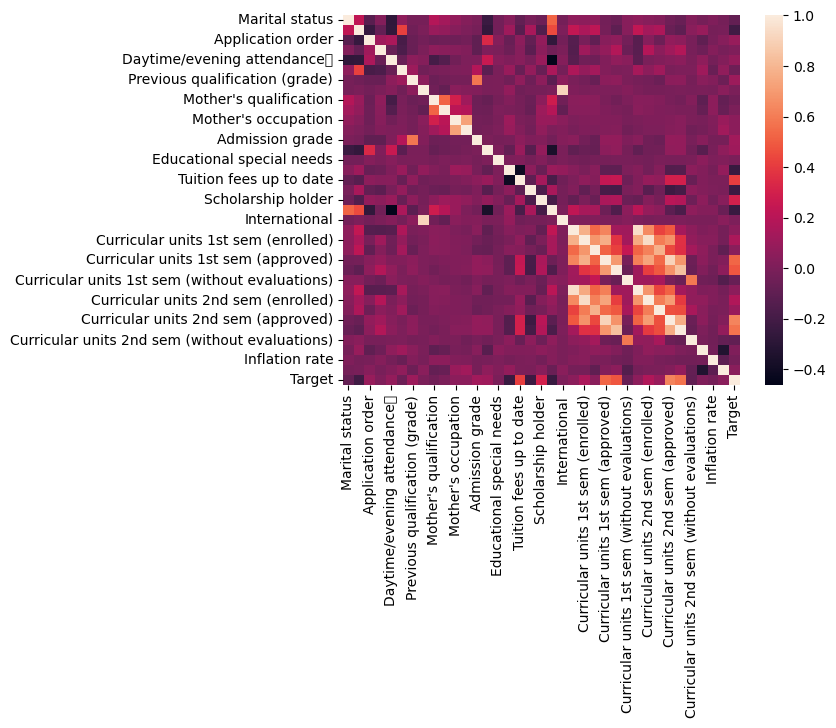

In [27]:
heatmap = sns.heatmap(corr)
#save the image
plt.savefig('heatmap.png')

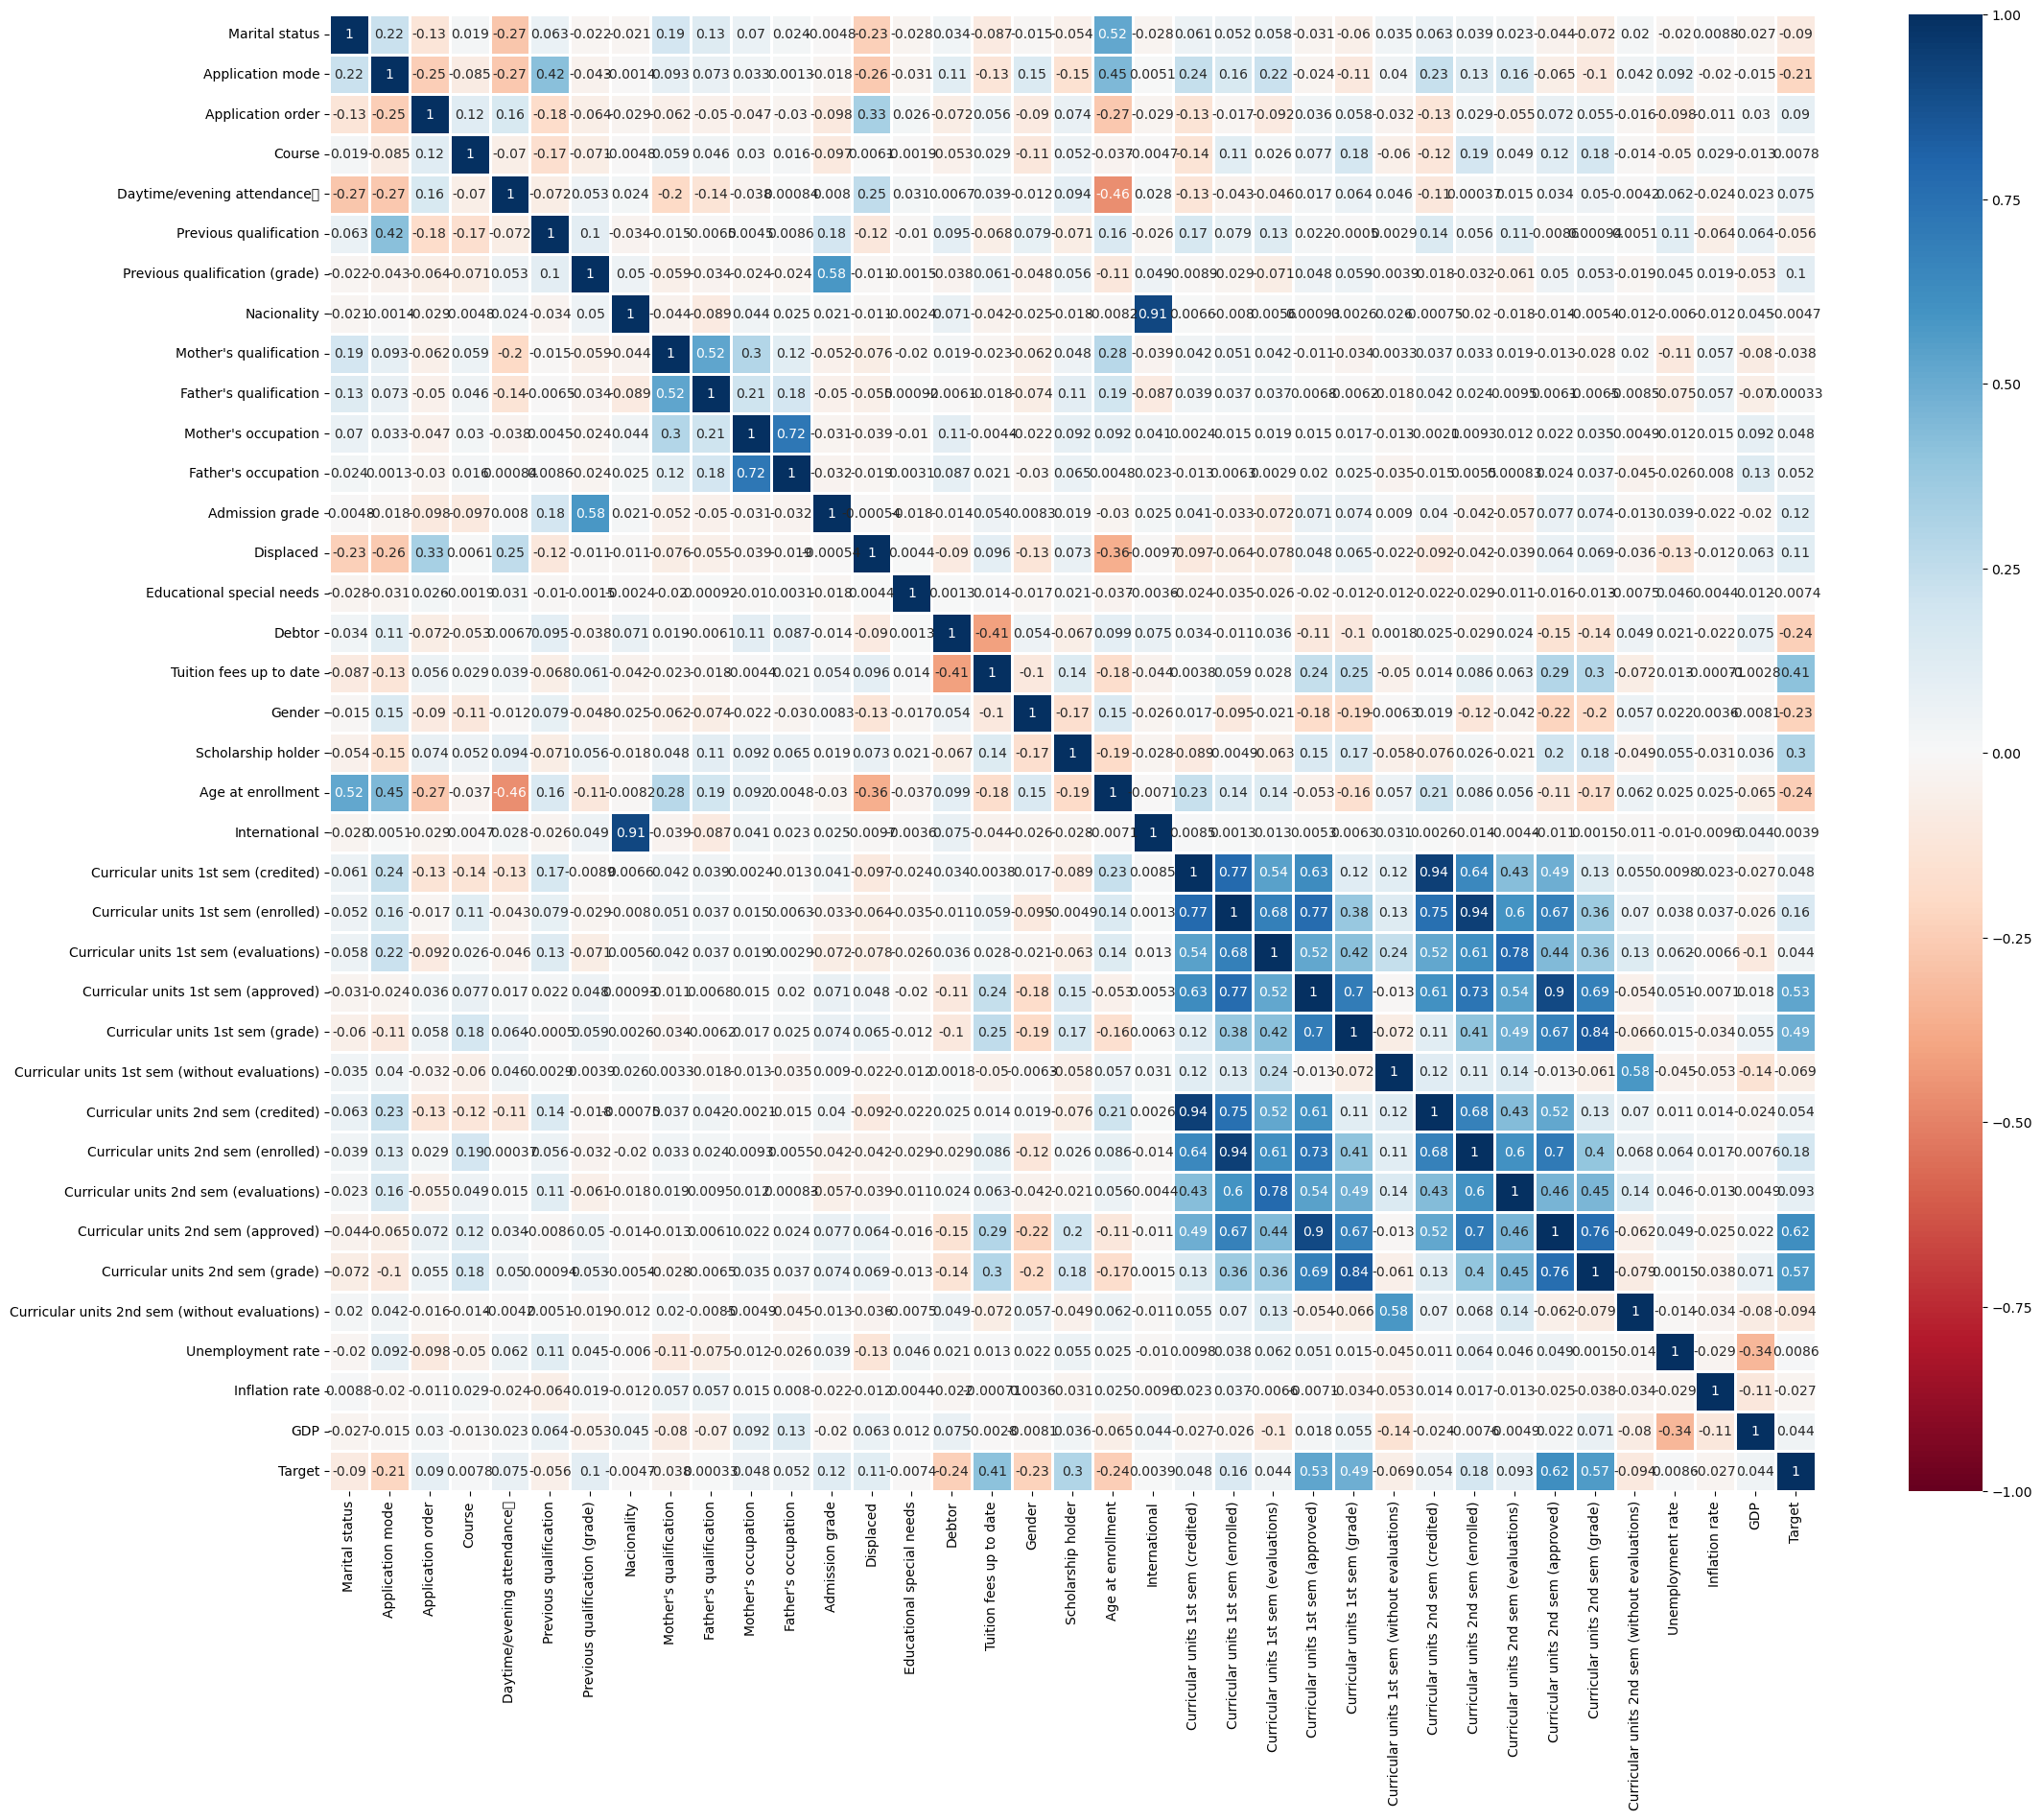

In [28]:
plt.figure(figsize=(25,20))
corr_heatmap = sns.heatmap(corr,cmap='RdBu',vmin=-1, vmax=1,linewidths = 2,annot = True)
#save the image
plt.savefig('corr_heatmap.png')

In [29]:
#save the plot as PNG file 
#plt.savefig('corr_heatmap.png')

From the heatmap, it can be observed that there are some strong positive or negative correlation between pairs of variables in the dataset. The strongest correlations are found:
* Curricular unit 1st sem(without evaluation) positvely correlated with curriculum units 1st semester (credited), with a correlation coefficient of 0.94.
* International students positvely correlates with nationality with a correlation coefficient of 0.91
* Daytime/evening attendance negatively correlated with Age of enrolment, With a correclation coefficient of -0.46
* Tuition Fee upto date negatively correlates with debtor With A correlation coefficient of 0.41

Although these correlations are relatively high, the risk of multicolliniarity is not expected to be significant. Overall, the heatmap suggest that there are strong correlation between these varialbles.


### Summary of the heatmap

* Curricular unit 1st sem (without evaluation) fairly correlated with curriculum units 1st semester (credited), with a correlation coefficient of 0.94:
The correlation coefficient of 0.94 indicates a very strong positive correlation between "Curricular unit 1st sem (without evaluation)" and "Curriculum units 1st semester (credited)." The closer the correlation coefficient is to +1, the stronger the positive correlation. It suggests that when one of these variables increases, the other tends to increase as well, and vice versa. The positive correlation indicates that students who perform well in the first semester without evaluation are likely to perform well in the credited curriculum units of the first semester.

* Daytime/evening attendance negatively correlated with Age of enrolment, with a correlation coefficient of -0.46:
The correlation coefficient of -0.46 indicates a moderate negative correlation between "Daytime/evening attendance" and "Age of enrolment." The closer the correlation coefficient is to -1, the stronger the negative correlation. It implies that as the age of enrollment increases, there is a tendency for students to attend daytime classes more frequently, and vice versa. This suggests that older students are more likely to enroll in daytime classes compared to evening classes.

* Admission grade fairly correlative positively with previous qualification grade, with a correlation coefficient of 0.42:
The correlation coefficient of 0.42 indicates a moderate positive correlation between "Admission grade" and "Previous qualification grade." The closer the correlation coefficient is to +1, the stronger the positive correlation. It suggests that students with higher admission grades are likely to have higher previous qualification grades, and vice versa. This means that students who performed well in their previous qualifications tend to have higher admission grades.
* Tuition Fee upto date negatively correlates with debtor With A correlation coefficient of 0.41


##### Let's plot the column Curricular units 2nd sem (approved) againt Curricular units 1st sem (approved) and differentiate Target by color

In [30]:
#fig = px.scatter(df1, 
        #     x = 'Curricular units 1st sem (approved)',
         #    y = 'Curricular units 2nd sem (approved)',
          #   color = 'Target')
#fig.show()

In [31]:
##fig = px.histogram(df1, 
 #            x = 'Curricular units 1st sem (enrolled)',
   #          y = 'Curricular units 2nd sem (enrolled)',
  #           color = 'Target')
#fig.show()

In [32]:
fighist = px.histogram(df1, y='Age at enrollment')
fighist.show()
#save the plot as PNG file 
plt.savefig('fighist.png')

<Figure size 640x480 with 0 Axes>

In [33]:
#save the plot as PNG file 
plt.savefig('fig.png')

<Figure size 640x480 with 0 Axes>

### FINDINGS FROM THE HISTOGRAM

Based on this data, we can make some observations:

* Peak at Age 18: The highest count (1036) is observed at the age of 18, indicating that a large number of individuals enrolled at that age. This peak suggests that age 19 is the most common age of enrollment in the group.

* Significant Enrollment at Age 20: There is a significant number of individuals (599) who enrolled at the age of 20. While not as high as the count at age 18, it still shows a considerable portion of the population enrolling at this age.

* Few Enrollments at Age 30: The count drops significantly to only 49 individuals enrolling at the age of 30. This suggests that enrolling at age 30 is less common compared to ages 19 and 20.

* Skewed Distribution: The data appears to be skewed to the left, as there is a sharp decline in the count as age increases beyond the peak at 19.

Overall, the histogram indicates that the majority of enrollments occur at ages 19 and 20, while enrollments at age 30 and upwards are relatively infrequent. The reasons for this distribution could be influenced by various factors, such as educational requirements, or special needs.

<AxesSubplot:xlabel='Age at enrollment', ylabel='Count'>

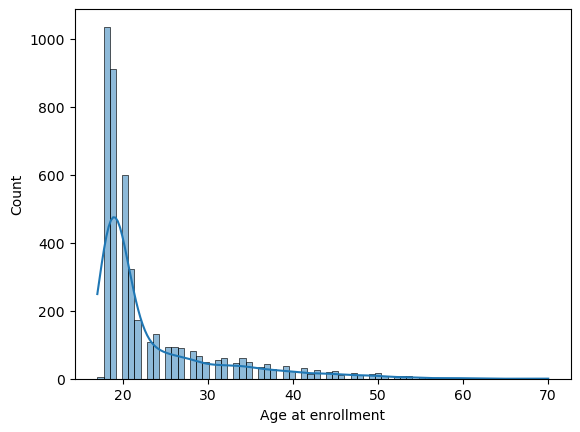

In [34]:
# Distribution of age of students at the time of enrollment
sns.histplot(data=df1['Age at enrollment'], kde=True)

In [35]:
#save the plot as PNG file 
#plt.savefig('histplot.png')

## Model building: Next step is to combine "enrolled" class and "graduated" class as a single class. 

Given that our dataset covers an entire year of college, we can consider students who remained enrolled as graduates, as both categories essentially denote the same status.

In [36]:
df1['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

In [37]:
# Define the mapping of old values to new values
value_mapping = {
    1: 2
}

# Replace the old values with new values in the specified column
df1['Target'].replace(value_mapping, inplace=True)

In [38]:
df1['Target'].value_counts()

2    3003
0    1421
Name: Target, dtype: int64

## Model building: Next step is to hot-encode

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [40]:
# Get the list of column names
column_names = df1.columns.tolist()
print(column_names)

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


In [41]:
df1['International'].unique()

array([0, 1], dtype=int64)

In [42]:
# Perform one-hot encoding on the categorical columns (Category1 and Category2)
df1_encoded = pd.get_dummies(df1, columns=['Marital status', 'Application mode', 'Application order', 
                                           'Course', 'Daytime/evening attendance\t', 'Previous qualification',
                                           'Nacionality', "Mother's qualification", "Father's qualification", 
                                           "Mother's occupation", "Father's occupation",'Displaced', 
                                           'Educational special needs', 'Debtor', 'Tuition fees up to date', 
                                           'Gender', 'Scholarship holder', 'Age at enrollment', 'International'
                                          ])

df1_encoded.shape

(4424, 308)

In [43]:
df1_encoded.columns

Index(['Previous qualification (grade)', 'Admission grade',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       ...
       'Age at enrollment_55', 'Age at enrollment_57', 'Age at enrollment_58',
       'Age at enrollment_59', 'Age at enrollment_60', 'Age at enrollment_61',
       'Age at enrollment_62', 'Age at enrollment_70', 'International_0',
       'International_1'],
      dtype='object', length=308)

## Linear regression using One-hot encoding

To perform our linear regression, we use the split the data into training and testing data stes, then fit a linear regression model using LineaRegression from scikit-learn and make prediction using it.

In [44]:
#split the data into input featuresn(X) and target variable (y)
X = df1_encoded.drop('Target',axis=1)
y = df1_encoded['Target']

In [45]:
#split the data into input training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [46]:
#create and fit the linear regression model 
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
#predict the target variable on the test set
y_pred = linear_reg.predict(X_test)


In [48]:
# Calculate evaluation metrics

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [49]:
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 0.4635923003209619
RMSE: 0.6808761270017931
MAE: 0.4873806384517334
R-squared: 0.4951487739164794


In [50]:
# Create a logistic regression model
model = LogisticRegression()

In [51]:
# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [53]:
# Calculate the accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

In [54]:
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.8531073446327684


### Findings from the Model

* MSE (Mean Squared Error): MSE is a common metric used to measure the average squared difference between the actual target values and the predicted values by the model. It gives you an idea of how close the predicted values are to the actual values. A lower MSE indicates better model performance. In this case, the MSE value is approximately 0.464.

* RMSE (Root Mean Squared Error): RMSE is the square root of MSE, and it provides an interpretable scale for the error, in the same unit as the target variable. It is commonly used to represent the average error made by the model. Lower RMSE values are preferred as they indicate better predictive accuracy. In this case, the RMSE value is approximately 0.681.

* MAE (Mean Absolute Error): MAE measures the average absolute difference between the actual target values and the predicted values. Unlike MSE, MAE is less sensitive to outliers. Again, lower MAE values indicate better model performance. In this case, the MAE value is approximately 0.487.

* R-squared (R2): R-squared is a statistical measure that represents the proportion of variance in the dependent variable (target) that is predictable from the independent variables (features) used in the model. It ranges from 0 to 1, with 1 being the best possible score, indicating that the model explains all the variability in the data. In this case, the R-squared value is approximately 0.495, which suggests that around 49.5% of the variance in the target variable is explained by the model.

 * for the Accuracy score, score of 0.8531073446327684 means that your classification model correctly predicted the class labels for approximately 85.31% of the instances in the test set. In other words, out of all the instances used to evaluate the model's performance, about 85.31% of them were classified correctly.

## Summary

* The model has an average squared difference of approximately 0.464 between its predicted values and the actual values, which is reasonably good as A lower MSE indicates better model performance. In this case, the MSE value is approximately 0.464
* The model's average absolute difference between predicted and actual values is approximately 0.487, which is also a decent performance indicator.
* The R-squared value of 0.495 indicates that the model accounts for about 49.5% of the variance in the target variable, which is modest but not very high. It suggests that there might be room for improvement..

-------------------------------------------------------- JUMPT THIS PART

## Model building: Next step is resampling  to address imbalanced classes. 

----Note: Do we want to give certain weight to each class? For example, do we give more importance to enrolled and dropout instead of graduate, or do we give 0 weight to all of the classes, I think this may be a good question for Stephen. I will include notes from our classes:

                                     

Let's look a the level of class imbalance in the dataset

In [55]:
print('Raw counts: \n')
print(df['Target'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['Target'].value_counts(normalize=True))

Raw counts: 

2    1
0    1
1    1
Name: Target, dtype: int64
-----------------------------------
Normalized counts: 

2    0.333333
0    0.333333
1    0.333333
Name: Target, dtype: float64


Based on the results, we can see that only 17.94% of the data corresponds to students with an "Enrolled" status

In [56]:
# Define appropriate X and y
y = df['Target']
X = df.drop('Target', axis=1)


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [57]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

2    1
0    1
1    1
Name: Target, dtype: int64


NameError: name 'SMOTE' is not defined

-

In [ ]:
print('Raw counts: \n')
print(y_test.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(y_test.value_counts(normalize=True))

In [ ]:
-------------------------------------------------------- JUMPT THIS PART

# MODEL BUILDING:

In [ ]:
# Prepare the feature matrix (X) and target variable (y)
X = df1_encoded.drop('Target', axis=1)  # Excluding the target column
y = df1_encoded['Target']

In [ ]:
X